# Hospital appointments show up analysis

In this occasion, I will be cleaning and wrangling the dataset to understand the probability of showing up depending on the data show at the dataset.

In [11]:
# Import libraries that I will be using at this first stage and opening Data.

import pandas as pd
import numpy as np

df = pd.read_csv('/.../Datacov/No shows.csv')

df.head() 

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [12]:
# Check how data looks like

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [13]:
# Unique values by column

for col in df:
    print("Unique values in", col)
    print(df[col].unique())
    print('\n')

Unique values in PatientId
[2.98725e+13 5.58998e+14 4.26296e+12 ... 7.26331e+13 9.96998e+14
 1.55766e+13]


Unique values in AppointmentID
[5642903 5642503 5642549 ... 5630692 5630323 5629448]


Unique values in Gender
['F' 'M']


Unique values in ScheduledDay
['2016-04-29T18:38:08Z' '2016-04-29T16:08:27Z' '2016-04-29T16:19:04Z' ...
 '2016-04-27T16:03:52Z' '2016-04-27T15:09:23Z' '2016-04-27T13:30:56Z']


Unique values in AppointmentDay
['2016-04-29T00:00:00Z' '2016-05-03T00:00:00Z' '2016-05-10T00:00:00Z'
 '2016-05-17T00:00:00Z' '2016-05-24T00:00:00Z' '2016-05-31T00:00:00Z'
 '2016-05-02T00:00:00Z' '2016-05-30T00:00:00Z' '2016-05-16T00:00:00Z'
 '2016-05-04T00:00:00Z' '2016-05-19T00:00:00Z' '2016-05-12T00:00:00Z'
 '2016-05-06T00:00:00Z' '2016-05-20T00:00:00Z' '2016-05-05T00:00:00Z'
 '2016-05-13T00:00:00Z' '2016-05-09T00:00:00Z' '2016-05-25T00:00:00Z'
 '2016-05-11T00:00:00Z' '2016-05-18T00:00:00Z' '2016-05-14T00:00:00Z'
 '2016-06-02T00:00:00Z' '2016-06-03T00:00:00Z' '2016-06-06T00:00:00Z'


In [14]:
# Change column names

df = df.rename(columns={'Hipertension': 'Hypertension', 'Handcap': 'Handicap', 'No-show': 'No_Show'})

In [15]:
# Check how many patients appears as age -1 and 0.

print("Patients with `Age` less than -1 => {}".format(df[df.Age == -1].shape[0]))
print("Patients with `Age` equal to 0 => {}".format(df[df.Age == 0].shape[0]))

Patients with `Age` less than -1 => 1
Patients with `Age` equal to 0 => 3539


In [16]:
Age_1 = df.loc[:, 'Age'] == -1
df_Age_1 = df.loc[Age_1]
df_Age_1

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_Show
99832,4.659430e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [17]:
# Since we only have 1 patient that has -1 record in age, we can drop it.

df = df[df.Age >= 0]

Change types for ScheduledDay and AppointmentDay to datetime64 to see if we can get the time of schedule and appointment

In [18]:
df1 = df

In [19]:
df1['ScheduledDay'] = df1.ScheduledDay.apply(np.datetime64)
df1['AppointmentDay'] = df1.AppointmentDay.apply(np.datetime64)

print(df1.ScheduledDay.head())
print(df1.AppointmentDay.head())

0   2016-04-29 18:38:08
1   2016-04-29 16:08:27
2   2016-04-29 16:19:04
3   2016-04-29 17:29:31
4   2016-04-29 16:07:23
Name: ScheduledDay, dtype: datetime64[ns]
0   2016-04-29
1   2016-04-29
2   2016-04-29
3   2016-04-29
4   2016-04-29
Name: AppointmentDay, dtype: datetime64[ns]


In [20]:
df1['Hour'] = df1.ScheduledDay.dt.hour

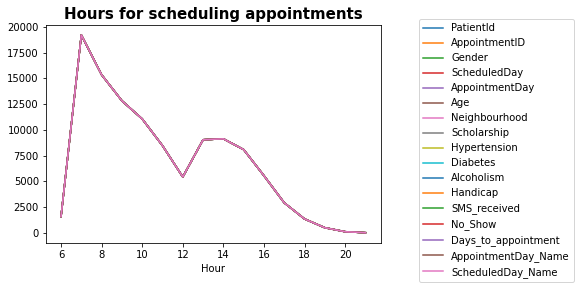

In [42]:
# Time for scheduling appointments

import matplotlib.pyplot as plt
import seaborn as sns


df1.groupby(["Hour"]).count()
df1.groupby(["Hour"]).count().plot()
plt.title('Hours for scheduling appointments', fontsize= 15, fontweight='bold')
plt.legend(bbox_to_anchor=(1.1, 1.05))

In [23]:
df1['Hour'].describe()

count    110526.000000
mean         10.774542
std           3.216192
min           6.000000
25%           8.000000
50%          10.000000
75%          13.000000
max          21.000000
Name: Hour, dtype: float64

- The busiest hour to receive appointments is at 7am

### Timeline for Schedule days and Appointments

Change types for columns PatientId, ScheduledDay and AppointmentDay so that is easier to manipulate

In [24]:
# Convert PatientId from Float to Integer
df['PatientId'] = df['PatientId'].astype('int64')

# Convert ScheduledDay and AppointmentDay from 'object' type to 'datetime64[ns]'
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay']).dt.date.astype('datetime64[ns]')
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']).dt.date.astype('datetime64[ns]')

In [25]:
# Groupby total Schedule by day
df_ScheduledDay_per_day = df.groupby(['ScheduledDay']).size().reset_index(name= 'Total_ScheduledDay')


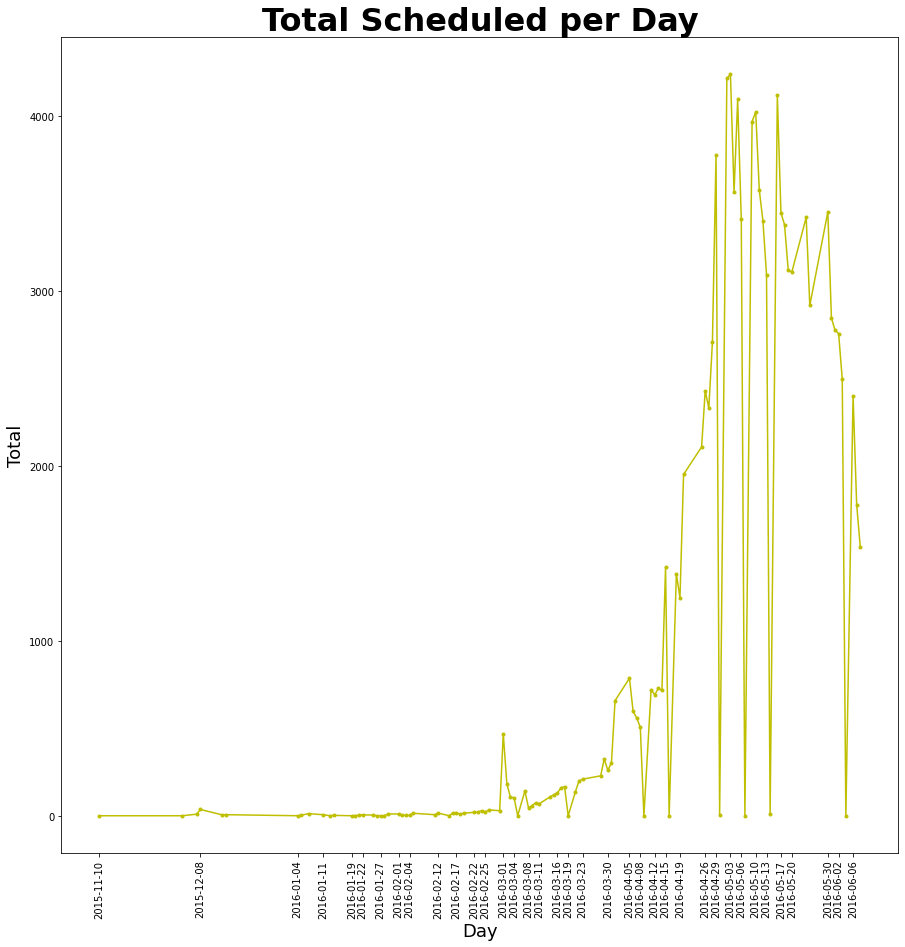

In [26]:
# Total by Schedule Day

plt.figure(figsize = (15,15))

plt.title("Total Scheduled per Day", fontsize= 32, fontweight='bold')

plt.plot(df_ScheduledDay_per_day['ScheduledDay'], df_ScheduledDay_per_day['Total_ScheduledDay'], 'y.-')


plt.xlabel('Day', fontsize= 18)
plt.ylabel('Total', fontsize= 18)
plt.xticks(df_ScheduledDay_per_day['ScheduledDay'][::3], rotation= 90)

plt.show()

It is interesting to see how most of the Schedules are made between April and June.

In [27]:
df_AppointmentDay_per_day = df.groupby(['AppointmentDay']).size().reset_index(name= 'Total_AppointmentDay')


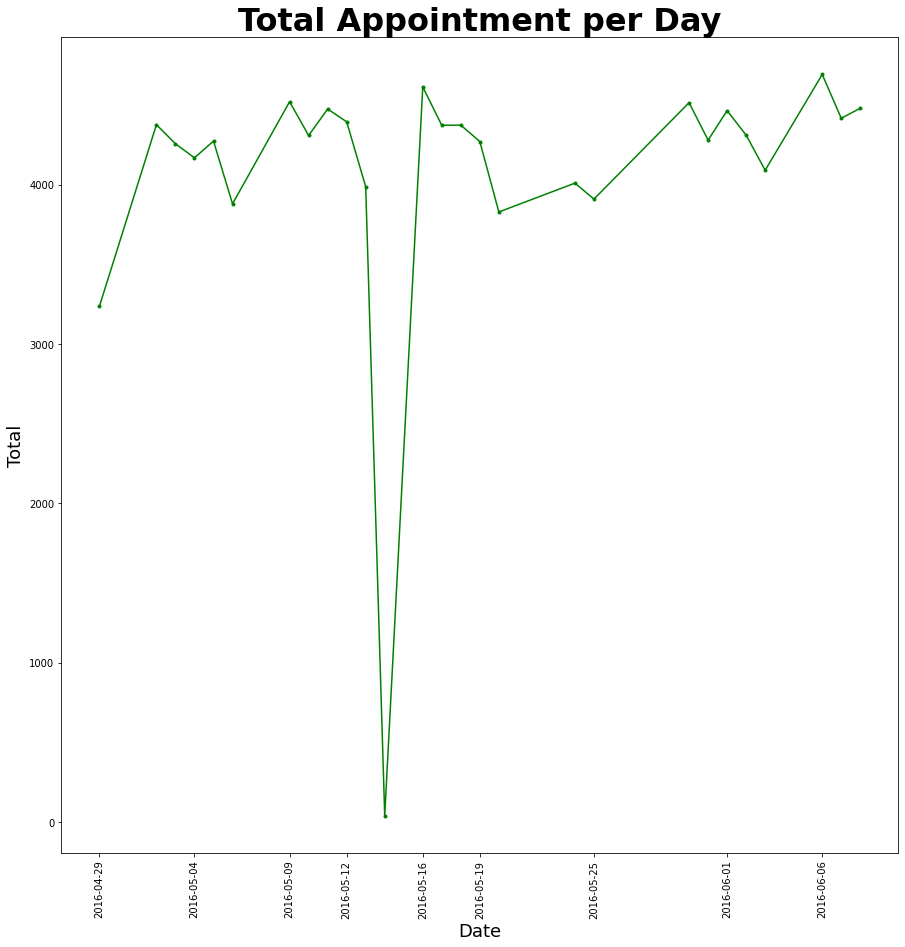

In [28]:
# Total by Appointment day

plt.figure(figsize = (15,15))

plt.title("Total Appointment per Day", fontsize= 32, fontweight='bold')

plt.plot(df_AppointmentDay_per_day['AppointmentDay'], df_AppointmentDay_per_day['Total_AppointmentDay'], 'g.-')


plt.xlabel('Date', fontsize= 18)
plt.ylabel('Total', fontsize= 18)
plt.xticks(df_AppointmentDay_per_day['AppointmentDay'][::3], rotation= 90)

plt.show()

As we can see, most of the appointments are taking place between April and June. So many patients may schedule their appointment very near to their appointment day.

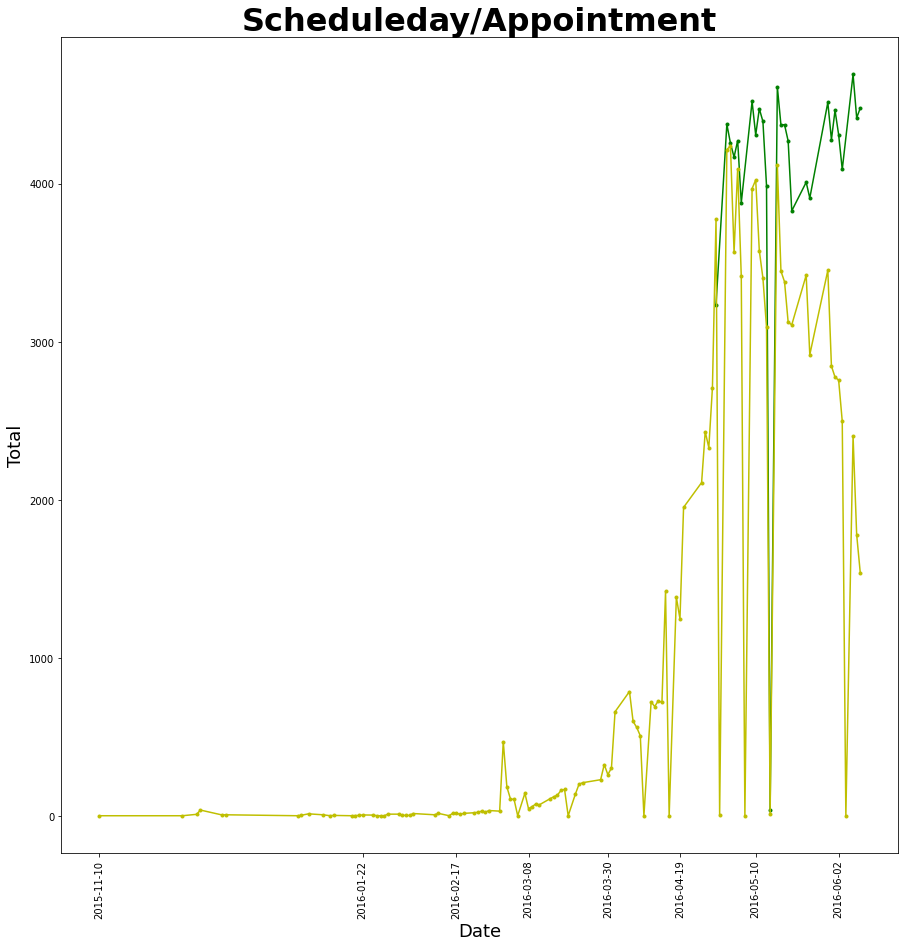

In [29]:
# Scheduleday/Appointment

plt.figure(figsize = (15,15))

plt.title("Scheduleday/Appointment", fontsize= 32, fontweight='bold')

plt.plot(df_AppointmentDay_per_day['AppointmentDay'], df_AppointmentDay_per_day['Total_AppointmentDay'], 'g.-')
plt.plot(df_ScheduledDay_per_day['ScheduledDay'], df_ScheduledDay_per_day['Total_ScheduledDay'], 'y.-')


plt.xlabel('Date', fontsize= 18)
plt.ylabel('Total', fontsize= 18)
plt.xticks(df_ScheduledDay_per_day['ScheduledDay'][::15], rotation= 90)

plt.show()

In [32]:
# Days to appointment
from datetime import datetime

df['Days_to_appointment'] = df['AppointmentDay'] - df['ScheduledDay']
df['Days_to_appointment'].value_counts().head()

0 days    38562
2 days     6725
4 days     5290
1 days     5213
7 days     4906
Name: Days_to_appointment, dtype: int64

- To conclude, by this timeline we can observe that there are 38562 patients that schedule their appointment on the same day and many others in the same week.
- The most busy period is between the end of April until mid-June, approx. Not just for schedules, but also regarding the appointments.

### Days of the week

In [33]:
# Create new columns to see the days of the week for each one of them.

df['AppointmentDay_Name'] = df['AppointmentDay'].dt.day_name()
df['ScheduledDay_Name'] = df['ScheduledDay'].dt.day_name()

In [34]:
# Days with more Scheduled appointments

df_1 = df['ScheduledDay_Name'].value_counts()

Text(0.5, 1.0, 'Days with more Schedules')

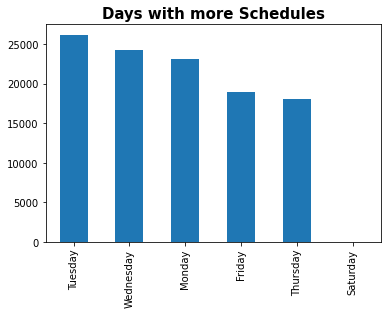

In [43]:
df_1.plot.bar();
plt.title('Days with more Schedules', fontsize= 15, fontweight='bold')

In [44]:
df['ScheduledDay_Name'].describe()

count      110526
unique          6
top       Tuesday
freq        26168
Name: ScheduledDay_Name, dtype: object

- The days of the week with more schedules are Tuesday and Wednesday, and they decrease by the arrival of the weekend.

In [46]:
# Days with more appointments

df_2 = df['AppointmentDay_Name'].value_counts()

Text(0.5, 1.0, 'Days with more Appointment')

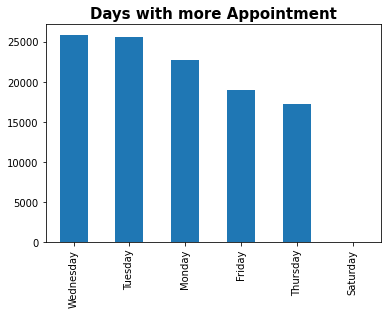

In [47]:
df_2.plot.bar();
plt.title('Days with more Appointment', fontsize= 15, fontweight='bold')

- As well as the schedule days, the appointments days have the same effect and decreases by the end of the week.

### Probability of showing up each day of the week

In [51]:
Appointment_By_Day_Show = df.groupby(['AppointmentDay_Name','No_Show']).count()
Appointment_By_Day_Show.sort_values(['No_Show'])

,,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Hour,Days_to_appointment,ScheduledDay_Name
AppointmentDay_Name,No_Show,,,,,,,,,,,,,,,,
Friday,No,14982,14982,14982,14982,14982,14982,14982,14982,14982,14982,14982,14982,14982,14982,14982,14982
Monday,No,18024,18024,18024,18024,18024,18024,18024,18024,18024,18024,18024,18024,18024,18024,18024,18024
Saturday,No,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30
Thursday,No,13909,13909,13909,13909,13909,13909,13909,13909,13909,13909,13909,13909,13909,13909,13909,13909
Tuesday,No,20488,20488,20488,20488,20488,20488,20488,20488,20488,20488,20488,20488,20488,20488,20488,20488
Wednesday,No,20774,20774,20774,20774,20774,20774,20774,20774,20774,20774,20774,20774,20774,20774,20774,20774
Friday,Yes,4037,4037,4037,4037,4037,4037,4037,4037,4037,4037,4037,4037,4037,4037,4037,4037
Monday,Yes,4690,4690,4690,4690,4690,4690,4690,4690,4690,4690,4690,4690,4690,4690,4690,4690
Saturday,Yes,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9


Text(0, 0.5, 'count of patients')

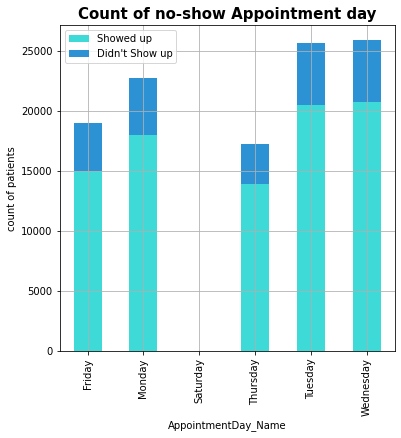

In [52]:
from itertools import cycle, islice

my_colors = list(islice(cycle(['#3EDAD8', '#2C92D4']), None, len(df)))

Appointment_By_Day_Show["PatientId"].unstack().plot(kind="bar", stacked=True, color= my_colors, figsize=(6,6), grid=True) #plot for the grouped dataframe
plt.title("Count of no-show Appointment day", fontsize = 15, fontweight='bold') 
plt.legend(["Showed up", "Didn't Show up"]); 
plt.ylabel("count of patients")

In [50]:
Appointment_noshow = pd.crosstab(index = df['AppointmentDay_Name'],
                        columns = df['No_Show'], normalize = 'index')
Appointment_noshow

No_Show,No,Yes
AppointmentDay_Name,,
Friday,0.787739,0.212261
Monday,0.793519,0.206481
Saturday,0.769231,0.230769
Thursday,0.806459,0.193541
Tuesday,0.799064,0.200936
Wednesday,0.803108,0.196892


- The Probability for showing-up is very similar between the days of the week but increases the probability of no showing on Fridays and Saturdays

### Patients show-up

In [53]:
Patient_Show = df[df.No_Show.str.contains('No|PatientId')]
Patient_NoShow = df[df.No_Show.str.contains('Yes|PatientId')]

In [54]:
print('Patients Show up: ', Patient_Show['No_Show'].count())
print('Patients Didn´t Show up: ', Patient_NoShow['No_Show'].count())

Patients Show up:  88207
Patients Didn´t Show up:  22319


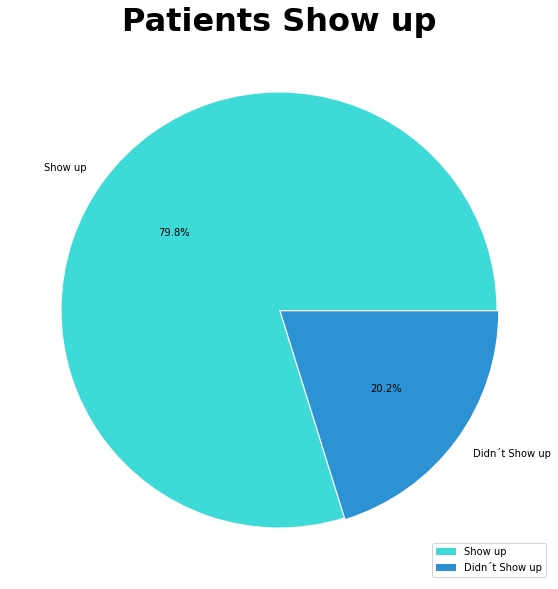

In [55]:
plt.figure(figsize = (10,10))

labels = ['Show up', 'Didn´t Show up']

values = df['No_Show'].value_counts()

explode = [0, 0.01]
colores = ['#3EDAD8', '#2C92D4']

plt.pie(values, labels= labels, autopct='%1.1f%%', explode = explode, colors= colores)
plt.legend(loc='lower right')
plt.title('Patients Show up', fontsize = 32, fontweight='bold')
plt.show()

- Almost 80% of the Patients show up.

### Gender

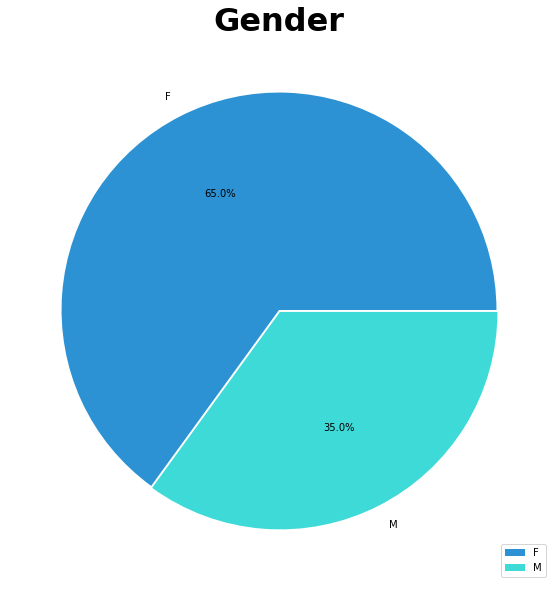

In [647]:
# Check how the data is distribute by gender

import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize = (10,10))

labels = ['F', 'M']

values = df['Gender'].value_counts()

explode = [0, 0.01]
colores = ['#2C92D4', '#3EDAD8']

plt.pie(values, labels= labels, autopct='%1.1f%%', explode = explode, colors= colores)
plt.legend(loc='lower right')
plt.title('Gender', fontsize = 32, fontweight='bold')
plt.show()

In [648]:
# Gender amount

print("Value counts per gender: ")
df['Gender'].value_counts()

Value counts per gender: 


F    71839
M    38687
Name: Gender, dtype: int64

- 65% percent of the patients are Female.

### Probability of Showing up by Gender

In [56]:
Gender_Show = df.groupby(["Gender","No_Show"]).count() #count each gender patients who showed up and who didn't
Gender_Show

PatientId  AppointmentID  ScheduledDay  AppointmentDay    Age  \
Gender No_Show                                                                  
F      No           57245          57245         57245           57245  57245   
       Yes          14594          14594         14594           14594  14594   
M      No           30962          30962         30962           30962  30962   
       Yes           7725           7725          7725            7725   7725   

                Neighbourhood  Scholarship  Hypertension  Diabetes  \
Gender No_Show                                                       
F      No               57245        57245         57245     57245   
       Yes              14594        14594         14594     14594   
M      No               30962        30962         30962     30962   
       Yes               7725         7725          7725      7725   

                Alcoholism  Handicap  SMS_received   Hour  \
Gender No_Show                                              
F      No            57245     57245         57245  57245   
       Yes           14594     14594         14594  14594   
M      No            30962     30962         30962  30962   
       Yes            7725      7725          7725   7725   

                Days_to_appointment  AppointmentDay_Name  ScheduledDay_Name  
Gender No_Show                                                               
F      No                     57245                57245              57245  
       Yes                    14594                14594              14594  
M      No                     30962                30962              30962  
       Yes                     7725                 7725               7725

Text(0, 0.5, 'count of patients')

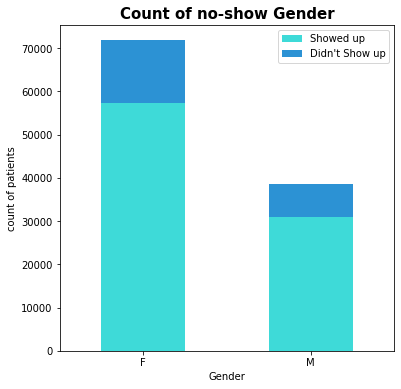

In [57]:
from itertools import cycle, islice

my_colors = list(islice(cycle(['#3EDAD8', '#2C92D4']), None, len(df)))

Gender_Show["PatientId"].unstack().plot(kind="bar", stacked=True, color=my_colors, rot=0, figsize=(6,6), grid=False) #plot for the grouped dataframe
plt.title("Count of no-show Gender", fontsize = 15, fontweight='bold') 
plt.legend(["Showed up", "Didn't Show up"]); 
plt.ylabel("count of patients")

In [58]:
Gender_noshow = pd.crosstab(index = df['Gender'],
                        columns = df['No_Show'], normalize = 'index')
Gender_noshow

No_Show,No,Yes
Gender,,
F,0.796851,0.203149
M,0.800321,0.199679


- Male have more probability of showing up, but the difference is not too much.

### Probability of Showing up by Age

In [59]:
age_noshow = pd.crosstab(index = df['Age'],
                        columns = df['No_Show'], normalize = 'index')
age_noshow = age_noshow.sort_values('No', ascending= False)
age_noshow

No_Show,No,Yes
Age,,
102,1.000000,0.000000
100,1.000000,0.000000
99,1.000000,0.000000
96,0.941176,0.058824
88,0.904762,0.095238
...,...,...
9,0.734694,0.265306
15,0.734104,0.265896
13,0.725295,0.274705


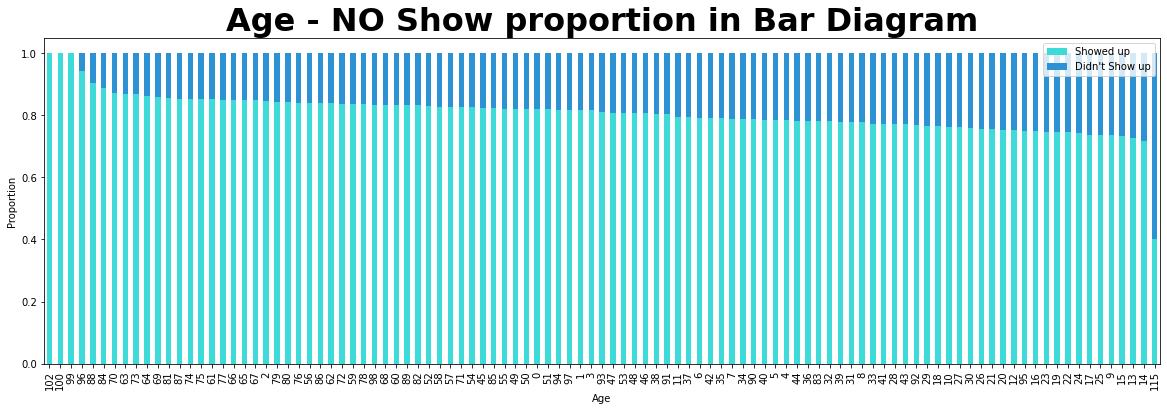

In [60]:
age_noshow.plot(kind = 'bar', stacked = True, figsize=(20,6), color = ['#3EDAD8', '#2C92D4'], rot= 90);
plt.xlabel('Age')
plt.ylabel('Proportion')
plt.title('Age - NO Show proportion in Bar Diagram', fontsize = 32, fontweight='bold')
plt.legend(["Showed up", "Didn't Show up"]);

- The Probability of showing up increases with the Age. We have some outliers regarding the ages over 100 and is because we don't have too many records.

### Probability of Showing up by Neighborhood

In [63]:
neighbor = pd.crosstab(index=df['Neighbourhood'], 
            columns=df["No_Show"])
neighbor_sort = neighbor.sort_values('No', ascending= False)
neighbor_sort

No_Show,No,Yes
Neighbourhood,,
JARDIM CAMBURI,6252,1465
MARIA ORTIZ,4586,1219
RESISTÊNCIA,3525,906
JARDIM DA PENHA,3246,631
SANTA MARTHA,2635,496
...,...,...
ILHA DO BOI,32,3
ILHA DO FRADE,8,2
AEROPORTO,7,1


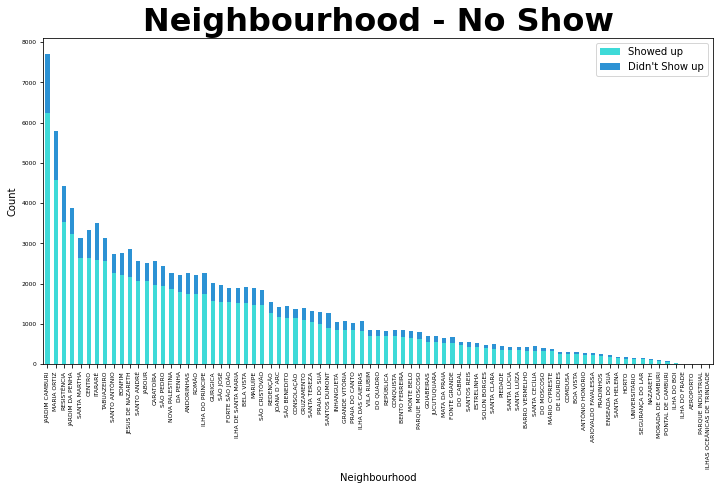

In [64]:
neighbor_sort.plot(kind='bar',figsize = (12,6), color = ['#3EDAD8', '#2C92D4'], fontsize = 6,
                                     stacked = True)

plt.xlabel('Neighbourhood')
plt.ylabel('Count')
plt.title('Neighbourhood - No Show', fontsize = 32, fontweight='bold')

plt.legend(["Showed up", "Didn't Show up"]);

- The Neighborhoods that have more appointments are JARDIM CAMBURI, MARIA ORTIZ, RESISTÊNCIA, JARDIM DA PENHA, SANTA MARTHA. There are all Neighborhoods around the airport.
The ones withe fewer appointments are the ones that are far from the city like the Ilhas Oceanicas and Parque Industrial and the airport that sounds very strange.

### Probability

In [67]:
neighbour_Noshow = pd.crosstab(index=df['Neighbourhood'], 
            columns=df["No_Show"], normalize = 'index')
neighbour_Noshowsort = neighbour_Noshow.sort_values('No', ascending= False)
neighbour_Noshowsort

No_Show,No,Yes
Neighbourhood,,
PARQUE INDUSTRIAL,1.000000,0.000000
ILHA DO BOI,0.914286,0.085714
AEROPORTO,0.875000,0.125000
MÁRIO CYPRESTE,0.854447,0.145553
SOLON BORGES,0.852878,0.147122
...,...,...
ITARARÉ,0.737336,0.262664
SANTA CLARA,0.735178,0.264822
SANTA CECÍLIA,0.725446,0.274554


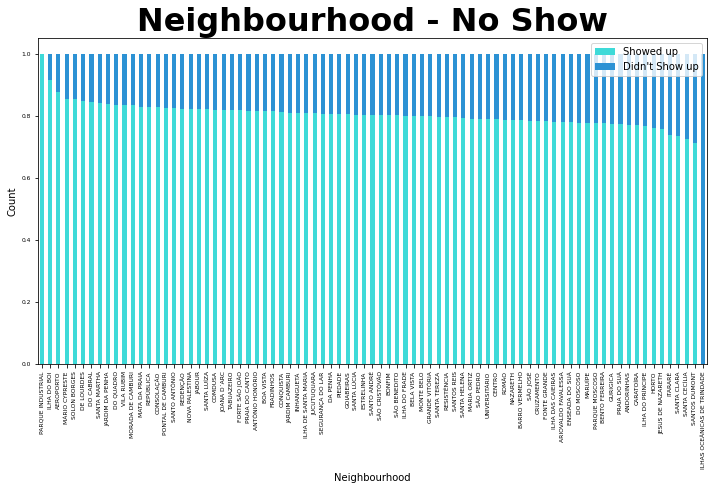

In [69]:
neighbour_Noshowsort.plot(kind='bar',figsize = (12,6), color = ['#3EDAD8', '#2C92D4'], fontsize = 6,
                                     stacked = True)

plt.xlabel('Neighbourhood')
plt.ylabel('Count')
plt.title('Neighbourhood - No Show', fontsize = 32, fontweight='bold')

plt.legend(["Showed up", "Didn't Show up"]);

- The probability of showing up has some outliers that are the ones with fewer appointments. The Neighbourhoods that have more probability of No-shows are Santos Dumont and Santa Cecilia. That are the ones that have more options of hospitals near around.

- There are 81 Neighbourhoods where the appoinments are supouse to take place. 
- There were only 2 appoinments schedule from ILHAS OCEÂNICAS DE TRINDADE Hospital and the patients didn't show up
- There was only 1 appoinment schedule at PARQUE INDUSTRIAL and the patient show up.
- The Neighbourhood with more appointments is JARDIM CAMBURI.
- Neighbourhoods with more probability of showing: ILHA DO BOI, AEROPORTO, MÁRIO CYPRESTE.
- Neighbourhoods with less probability of showing: SANTOS DUMONT, SANTA CECÍLIA, SANTA CLARA.

In [71]:
#N = df.loc[:, 'Neighbourhood'] == 'SANTOS DUMONT'
#df_N = df.loc[N]
#df_N['AppointmentDay_Name'].describe()

### Create a new column with general appointments

I notice that the amount of appointments are not the same as the sum of Scholarship, Hypertension, Diabetes and Alcoholism. So I decided to add another column with a 5th possibility for appointment, as it was a general appointment.

In [72]:
df['Other'] = df.Scholarship + df.Hypertension + df.Diabetes + df.Alcoholism

In [73]:
df['Other'].value_counts()

0    76778
1    24420
2     8459
3      849
4       20
Name: Other, dtype: int64

In [74]:
df['Other'] = df['Other'].replace({0: 1, 1: 0, 2:0, 3: 0, 4:0})

### Probability of Showing up by type of appoinment

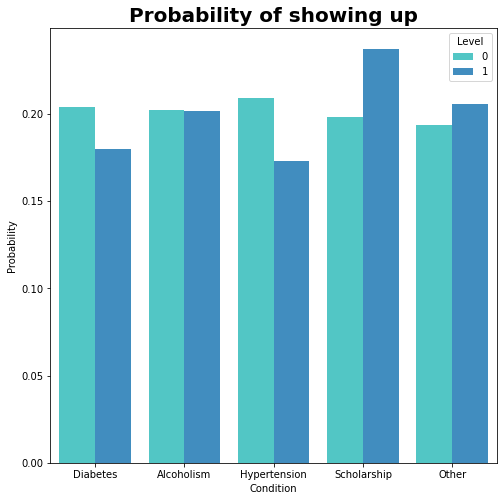

In [76]:
def probStatusCategorical(group_by):
    rows = []
    for item in group_by:
        for level in df[item].unique():
            row = {'Condition': item}
            total = len(df[df[item] == level])
            n = len(df[(df[item] == level) & (df.No_Show == 'Yes')])
            row.update({'Level': level, 'Probability': n / total})
            rows.append(row)
    return pd.DataFrame(rows)

# set the figure size
plt.figure(figsize=(8, 8))

sns.barplot(data = probStatusCategorical(['Diabetes', 'Alcoholism', 'Hypertension',
                                         'Scholarship', 'Other']),
            x = 'Condition', y = 'Probability', hue = 'Level', palette = ['#3EDAD8', '#2C92D4'])
plt.title('Probability of showing up',fontsize=20, fontweight='bold')
plt.show()

- Appointments schedule with Scholarship and General appointments(Other) are more likely to don't show than the appointments taken for diabetes, alcoholism and hypertension

In [77]:
#Hypertension = df[df.Hypertension == 1]


In [78]:
#Hypertension[df.No_Show == 'Yes']

### Probability of Showing up by Handicap

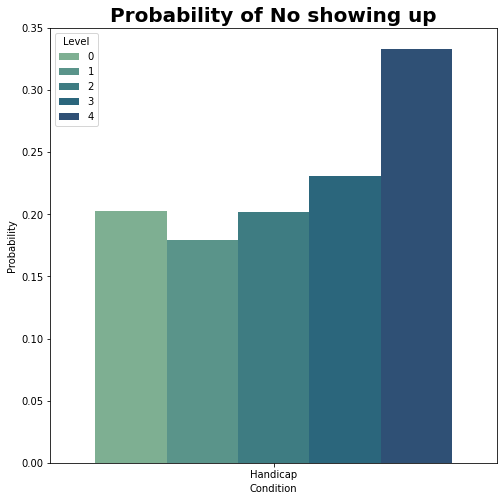

In [79]:
plt.figure(figsize=(8, 8))

sns.barplot(data = probStatusCategorical(['Handicap']),
            x = 'Condition', y = 'Probability', hue = 'Level', palette = 'crest')
plt.title('Probability of No showing up',fontsize=20, fontweight='bold')
plt.show()

In [80]:
Handicap_noshow = pd.crosstab(index = df['Handicap'],
                        columns = df['No_Show'], normalize = 'index')
Handicap_noshow

No_Show,No,Yes
Handicap,,
0,0.797645,0.202355
1,0.820764,0.179236
2,0.797814,0.202186
3,0.769231,0.230769
4,0.666667,0.333333


In [81]:
Handicap_noshow.mean()

No_Show
No     0.770424
Yes    0.229576
dtype: float64

In [82]:
df_5 = df['Handicap'].value_counts()

Text(0.5, 1.0, 'Handicap')

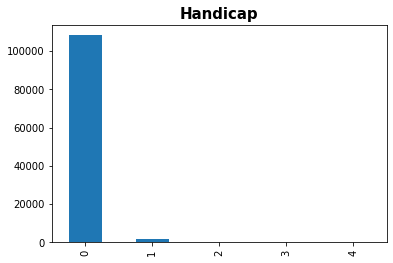

In [83]:
df_5.plot.bar();

plt.title('Handicap', fontsize= 15, fontweight='bold')

In [84]:
df_5

0    108285
1      2042
2       183
3        13
4         3
Name: Handicap, dtype: int64

- The probability of attending to the appointment with a handicap of 4 is more than the other, but at the same time the patients with handicap 4 are only 3.
- Handicaps 0 to 2 are more the ones that can measure real probabilities, and they don’t seem to be far apart from each other.

### Probability of showing up if they received a SMS.

In [85]:
Sms_Show = df.groupby(["SMS_received","No_Show"]).count() 
Sms_Show

PatientId  AppointmentID  Gender  ScheduledDay  \
SMS_received No_Show                                                   
0            No           62509          62509   62509         62509   
             Yes          12535          12535   12535         12535   
1            No           25698          25698   25698         25698   
             Yes           9784           9784    9784          9784   

                      AppointmentDay    Age  Neighbourhood  Scholarship  \
SMS_received No_Show                                                      
0            No                62509  62509          62509        62509   
             Yes               12535  12535          12535        12535   
1            No                25698  25698          25698        25698   
             Yes                9784   9784           9784         9784   

                      Hypertension  Diabetes  Alcoholism  Handicap   Hour  \
SMS_received No_Show                                                        
0            No              62509     62509       62509     62509  62509   
             Yes             12535     12535       12535     12535  12535   
1            No              25698     25698       25698     25698  25698   
             Yes              9784      9784        9784      9784   9784   

                      Days_to_appointment  AppointmentDay_Name  \
SMS_received No_Show                                             
0            No                     62509                62509   
             Yes                    12535                12535   
1            No                     25698                25698   
             Yes                     9784                 9784   

                      ScheduledDay_Name  Other  
SMS_received No_Show                            
0            No                   62509  62509  
             Yes                  12535  12535  
1            No                   25698  25698  
             Yes                   9784   9784

Text(0, 0.5, 'count of patients')

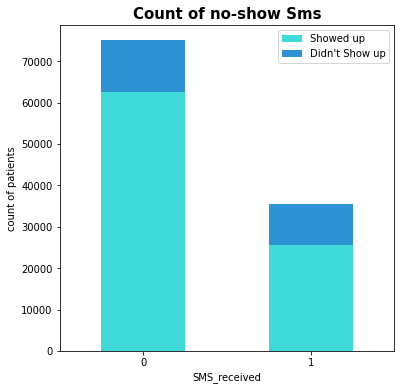

In [86]:
from itertools import cycle, islice

my_colors = list(islice(cycle(['#3EDAD8', '#2C92D4']), None, len(df)))

Sms_Show["PatientId"].unstack().plot(kind="bar", stacked=True, color=my_colors, rot=0, figsize=(6,6), grid=False) #plot for the grouped dataframe
plt.title("Count of no-show Sms", fontsize= 15, fontweight='bold')
plt.legend(["Showed up", "Didn't Show up"]); 
plt.ylabel("count of patients")

In [87]:
SMS_noshow = pd.crosstab(index = df['SMS_received'],
                        columns = df['No_Show'], normalize = 'index')
SMS_noshow

No_Show,No,Yes
SMS_received,,
0,0.832965,0.167035
1,0.724255,0.275745


- Percentage of People that show up by receiving a SMS = 72,43%

- Percentage of People that show up without receiving a SMS = 83,30%

## Conclusion

- The busiest hour to receive appointments is at 7am
- Most of the Schedules are made between April and June.
- Almost 35% of patients schedules their appoinment for the same day. And most other in the same week.
- Busiest period is between the end of April until mid-June.
- Most schedules are Tuesday and Wednesday, and they decrease by the arrival of the weekend.
- The appointments days have the same effect and decreases by the end of the week. The probability of no showing increases on Fridays and Saturdays
- 79,80% of the Patients show up.
- 65% percent of the patients are Female, 35% are Male.
- Male have more probability of showing up, but the difference is not too much. 0,3%
- The Probability of showing up increases with the Age. Outliers ages over 100.
- There are 81 Neighbourhoods where the appoinments are supouse to take place.
- The Neighbourhood with more appointments is JARDIM CAMBURI. There are all Neighborhoods around the airport.
- Neighbourhoods with more probability of showing: ILHA DO BOI, AEROPORTO, MÁRIO CYPRESTE.
- The ones withe fewer appointments are the ones that are far from the city like the Ilhas Oceanicas and Parque Industrial and the airport that sounds very strange.
- Neighbourhoods with less probability of showing: SANTOS DUMONT, SANTA CECÍLIA, SANTA CLARA.
- The probability of showing up has some outliers that are the ones with fewer appointments. The Neighbourhoods that have more probability of No-shows are Santos Dumont and Santa Cecilia. That are the ones that have more options of hospitals near around.
- Appointments schedule with Scholarship and General appointments(Other) are more likely to don't show than the appointments taken for diabetes, alcoholism and hypertension(The ones that don´t need to pay por the oppointments)
- The probability of attending to the appointment with a handicap of 4 is more than the other, but at the same time the patients with handicap 4 are only 3.
- Handicaps 0 to 2 are more the ones that can measure real probabilities, and they don’t seem to be far apart from each other.
- Percentage of People that show up by receiving a SMS = 72,43%
- Percentage of People that show up without receiving a SMS = 83,30%